In [28]:
from carbon import CarbonSimulatorUI, CarbonOrderUI, P, analytics as al, __version__, __date__
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt
print(f"Carbon v{__version__} ({__date__})")
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CarbonSimulatorUI))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CarbonOrderUI))

Carbon v2.1-BETA1 (14/Dec/2022)
CarbonSimulatorUI v2.2 (8/Dec/2022)
CarbonOrderUI v1.5 (16/Dec/2022)


# Order Book example (NBTest 45)

NBTEST: NOTEST_DEFAULT = TEST

In [29]:
NUM_POINTS = 100   # number of points on the precise chart

In [30]:
ETHUSDC = P(tknq="USDC", tknb="ETH")
Sim = CarbonSimulatorUI(pair=ETHUSDC, verbose=False, raiseonerror=True)
orders = tuple([
    al.orders_nt("ETH", 100, 2000, 3000),
    al.orders_nt("ETH", 100, 2100, 2550),
    al.orders_nt("ETH", 50, 2300, 2450),
    al.orders_nt("ETH", 75, 2400, 2500),
    al.orders_nt("ETH", 80, 2500, 2700),
    al.orders_nt("USDC", 1000*150, 1500, 500),
    al.orders_nt("USDC", 1000*50, 1500, 1300),
    al.orders_nt("USDC", 1000*20, 1450, 1350),
    al.orders_nt("USDC", 1100*150, 1200, 1000),
])
for o in orders:
    Sim.add_order(o.tkn, o.amt, o.p_start, o.p_end)
Sim.add_order("WBTC", 1, 10000, 15000, pair="WBTC/USDC")
Sim.add_order("USDC", 1, 9000, 7500, pair="WBTC/USDC")
Sim.add_order("USDC", 10000, 0.99, 1.01, pair="USDC/USDT")
Sim.add_order("USDT", 10000, 1.01, 0.99, pair="USDC/USDT")
Sim.state()["orders"]

,id,pair,tkn,y_int,y,y_unit,disabled,p_start,p_end,p_marg,p_unit,lid
0,0,ETHUSDC,ETH,100.0,100.0,ETH,False,2000.0,3000.0,2000.0,USDC per ETH,1
1,1,ETHUSDC,USDC,0.0,0.0,USDC,True,None,None,None,USDC per ETH,0
2,2,ETHUSDC,ETH,100.0,100.0,ETH,False,2100.0,2550.0,2100.0,USDC per ETH,3
3,3,ETHUSDC,USDC,0.0,0.0,USDC,True,None,None,None,USDC per ETH,2
4,4,ETHUSDC,ETH,50.0,50.0,ETH,False,2300.0,2450.0,2300.0,USDC per ETH,5
5,5,ETHUSDC,USDC,0.0,0.0,USDC,True,None,None,None,USDC per ETH,4
6,6,ETHUSDC,ETH,75.0,75.0,ETH,False,2400.0,2500.0,2400.0,USDC per ETH,7
7,7,ETHUSDC,USDC,0.0,0.0,USDC,True,None,None,None,USDC per ETH,6
8,8,ETHUSDC,ETH,80.0,80.0,ETH,False,2500.0,2700.0,2500.0,USDC per ETH,9
9,9,ETHUSDC,USDC,0.0,0.0,USDC,True,None,None,None,USDC per ETH,8


In [31]:
prices = al.linspace(500,3000, NUM_POINTS)
prices

0      500.000000
1      525.252525
2      550.505051
3      575.757576
4      601.010101
         ...     
95    2898.989899
96    2924.242424
97    2949.494949
98    2974.747475
99    3000.000000
Length: 100, dtype: float64

In [32]:
curves_by_pair_bidask = CarbonOrderUI.curves_by_pair_bidask(Sim.state()["orderuis"])
print(list(curves_by_pair_bidask.keys()))

['ETH/USDC', 'USDC/USDT', 'WBTC/USDC']


## curves_by_pair_bidask

In [33]:
cbpba = curves_by_pair_bidask
#cbpba["ETH/USDC"]

In [34]:
print(list(cbpba.keys()))
assert set(cbpba.keys()) == {'ETH/USDC', 'WBTC/USDC', 'USDC/USDT'}
assert "ALL" in cbpba["WBTC/USDC"].keys()
assert "BID" in cbpba["WBTC/USDC"].keys()
assert "ASK" in cbpba["WBTC/USDC"].keys()
assert len(cbpba["WBTC/USDC"]["ALL"])==len(cbpba["WBTC/USDC"]["BID"])+len(cbpba["WBTC/USDC"]["ASK"])
assert len(cbpba["ETH/USDC"]["ALL"])==len(cbpba["ETH/USDC"]["BID"])+len(cbpba["ETH/USDC"]["ASK"])

['ETH/USDC', 'USDC/USDT', 'WBTC/USDC']


In [35]:
assert set(c.tkn for c in cbpba["ETH/USDC"]["ALL"]) == {'ETH', 'USDC'}
assert set(c.tkn for c in cbpba["ETH/USDC"]["BID"]) == {'USDC'}
assert set(c.tkn for c in cbpba["ETH/USDC"]["ASK"]) == {'ETH'}

In [36]:
assert [int(c.p_marg) for c in cbpba["ETH/USDC"]["BID"] if not c.p_marg is None] == [1500, 1500, 1450, 1200]
assert [int(c.p_marg) for c in cbpba["ETH/USDC"]["ASK"] if not c.p_marg is None] == [2000, 2100, 2300, 2399, 2500]

## CarbonOrderUI id and linked

In [37]:
p1 = CarbonOrderUI.from_prices(ETHUSDC, "ETH", 2000, 3000, 10, 10)
p2 = CarbonOrderUI.from_prices(ETHUSDC, "USDC", 1000, 750, 10, 10)
p1,p2

(CarbonOrderUI(pair=ETH/USDC, B=0.018257418583505537, S=0.004103261191492361, yint=10, y=10, id=None, linked=None),
 CarbonOrderUI(pair=ETH/USDC, B=27.386127875258307, S=4.236648726425486, yint=10, y=10, id=None, linked=None))

In [38]:
assert p1.id is None
assert p1.linked is None

In [39]:
p1.set_id(1)
p2.set_id(2)
assert p1.id == 1
assert p2.id == 2

In [40]:
p1.set_linked(p2)
p2.set_linked(p1)
assert p1.linked.id == 2
assert p2.linked.id == 1

In [41]:
p1.linked

CarbonOrderUI(pair=ETH/USDC, B=27.386127875258307, S=4.236648726425486, yint=10, y=10, id=2, linked=<1>)

In [42]:
try:
    p1.set_id(1)
    raise RuntimeError("Should raise")
except ValueError as e:
    print(e)

('Index has already been set', 1, 1)


In [43]:
try:
    p1.set_linked(p2)
    raise RuntimeError("Should raise")
except ValueError as e:
    print(e)

('Linked object has already been set', 2, 2)


In [44]:
curves = curves_by_pair_bidask["ETH/USDC"]
assert [c.id for c in curves["ALL"]] == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
assert [c.id for c in curves["BID"]] == [1, 3, 5, 7, 9, 10, 12, 14, 16]
assert [c.id for c in curves["ASK"]] == [0, 2, 4, 6, 8, 11, 13, 15, 17]

In [45]:
assert [c.linked.id for c in curves["ALL"]] == [1, 0, 3, 2, 5, 4, 7, 6, 9, 8, 11, 10, 13, 12, 15, 14, 17, 16]
assert [c.linked.id for c in curves["BID"]] == [c.id for c in curves["ASK"]]
assert [c.linked.id for c in curves["ASK"]] == [c.id for c in curves["BID"]]

## Approximate liquidity [NOTEST]

In [46]:
liq =  al.calc_liquidity_approx(Sim.state()["orderuis"], prices, ETHUSDC, reverse=False)
liqr = al.calc_liquidity_approx(Sim.state()["orderuis"], prices, ETHUSDC, reverse=True)

[calc_liquidity_approx] pair:ETHUSDC ETH USDC
[calc_liquidity_approx] ask:9 bid:9
[calc_liquidity_approx] tkn=ETH
[calc_liquidity_approx] pair:ETHUSDC ETH USDC
[calc_liquidity_approx] ask:9 bid:9
[calc_liquidity_approx] tkn=USDC


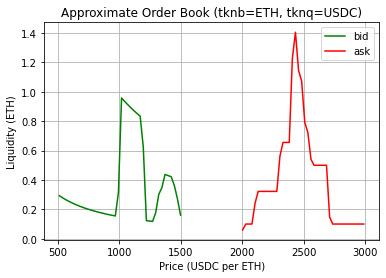

In [47]:
al.plot_approx_orderbook_chart(liq)

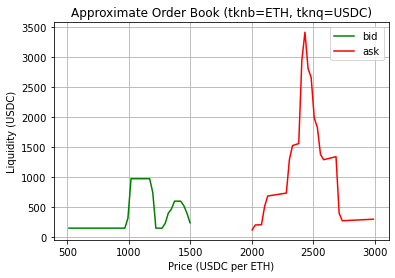

In [48]:
al.plot_approx_orderbook_chart(liqr)

## ASK _ AMM SELLS base token [NOTEST]

In [49]:
curves = curves_by_pair_bidask["ETH/USDC"]["ASK"]
c0 = curves[0]
print(f"pair={c0.pair.slashpair} [{c0.pair.price_convention}] tkny={c0.tkny} tknx={c0.tknx}")
dy_p = lambda p: sum(c.dyfromp_f(p) for c in curves)
dx_p = lambda p: sum(c.dxfromdy_f(c.dyfromp_f(p)) for c in curves)
dy_amounts = [dy_p(p) for p in prices]
dx_amounts = [dx_p(p) for p in prices]

pair=ETH/USDC [USDC per ETH] tkny=ETH tknx=USDC


Text(0, 0.5, 'Cumulative amount of y sold [ETH]')

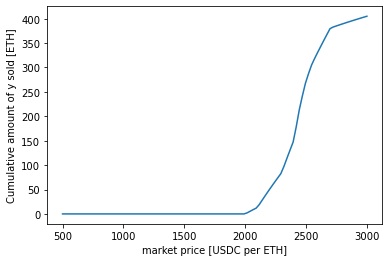

In [50]:
plt.plot(prices, dy_amounts)
plt.xlabel(f"market price [{c0.pair.price_convention}]")
plt.ylabel(f"Cumulative amount of y sold [{c0.tkny}]")

Text(0, 0.5, 'Cumulative amount of x bought [USDC]')

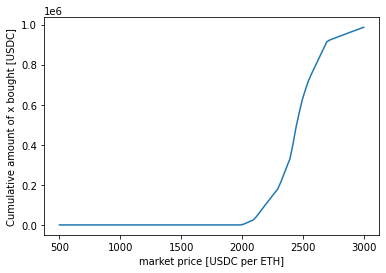

In [51]:
plt.plot(prices, dx_amounts)
plt.xlabel(f"market price [{c0.pair.price_convention}]")
plt.ylabel(f"Cumulative amount of x bought [{c0.tknx}]")

In [52]:
OB = al.OrderBook(dy_amounts, dx_amounts, "ETH", "USDC")
print(OB.explain())

This is the ASK book.
Source token = ETH, target token = USDC.
AMM sells ETH for USDC.
Base token = ETH, quote token = USDC.
Prices are quoted in USDC per ETH.
Order book amounts are quoted in USDC.


'plotted tokens received against trade size (986,606)'

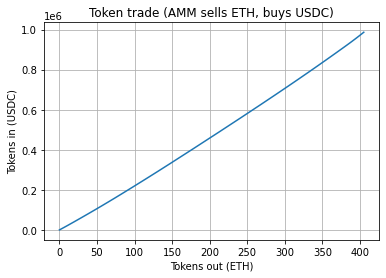

In [53]:
OB.plot_token_amount_chart()

When SELLING ETH, the AMM sells more and more expensively the more ETH it sells

'plotted marginal and effective prices against trade size'

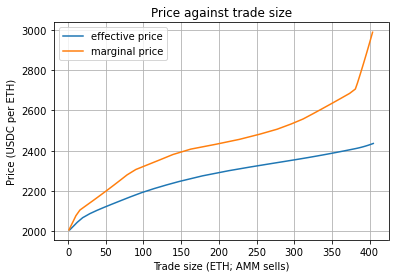

In [54]:
OB.plot_price_chart()

When SELLING ETH, the AMM pays more (in ETH terms) for the first units of USD received than for the later ones

'plotted order book (981,731)'

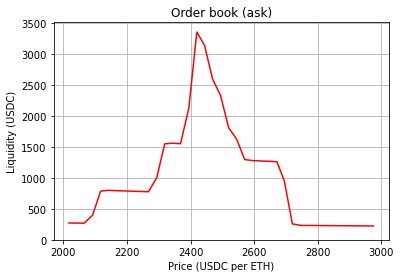

In [55]:
OB.plot_orderbook_chart()

## BID _ AMM BUYS base token [NOTEST]

In [56]:
curves = curves_by_pair_bidask["ETH/USDC"]["BID"]
c0 = curves[0]
print(f"pair={c0.pair.slashpair} [{c0.pair.price_convention}] tkny={c0.tkny} tknx={c0.tknx}")
dy_p = lambda p: sum(c.dyfromp_f(p) for c in curves)
dx_p = lambda p: sum(c.dxfromdy_f(c.dyfromp_f(p)) for c in curves)
dy_amounts = [dy_p(p) for p in prices]
dx_amounts = [dx_p(p) for p in prices]

pair=ETH/USDC [USDC per ETH] tkny=USDC tknx=ETH


In [57]:
OB2 = al.OrderBook(dx_amounts, dy_amounts, "ETH", "USDC", bidask=al.OrderBook.BID)
print(OB2.explain())

This is the BID book.
Source token = ETH, target token = USDC.
AMM buys ETH for USDC.
Base token = ETH, quote token = USDC.
Prices are quoted in USDC per ETH.
Order book amounts are quoted in USDC.


'plotted tokens received against trade size (385,000)'

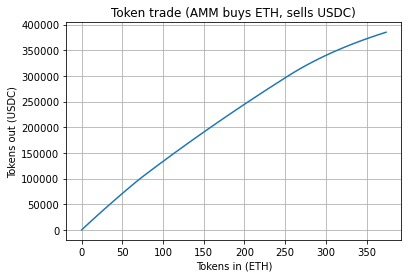

In [58]:
OB2.plot_token_amount_chart()

'plotted marginal and effective prices against trade size'

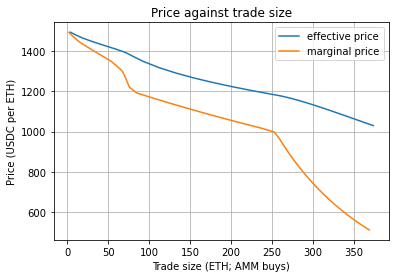

In [59]:
OB2.plot_price_chart()

'plotted order book (-379,713)'

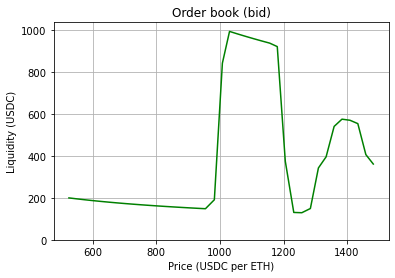

In [60]:
OB2.plot_orderbook_chart()

## Combined [NOTEST]

Note: the liquidity is USDC liquidity, not ETH liquidity. This makes the numbers somewhat harder to verify. However -- this means that liquidity can be compared across different pairs that are using the same quote token.

'plotted order book (981,731)'

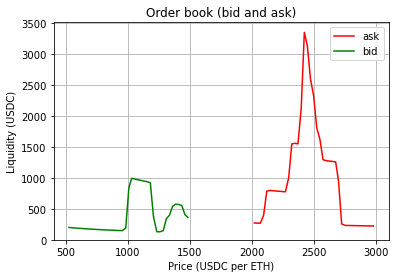

In [61]:
OB.plot_orderbook_chart(otherob=OB2)

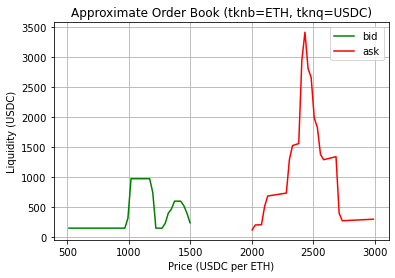

In [62]:
al.plot_approx_orderbook_chart(liqr)

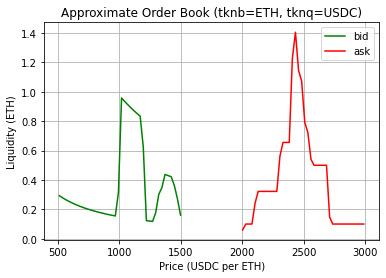

In [63]:
al.plot_approx_orderbook_chart(liq)